# Model

## 1. Import Libraries and Utilities

In [26]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN, MeanShift, KMeans, AgglomerativeClustering, estimate_bandwidth, BisectingKMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
!pip install minisom

In [2]:
from minisom import MiniSom
from EDA.age import calc_age
from EDA.educ import education
from EDA.data_load import data_load

## 2. Import Dataset

In [3]:
# Import dataset
cust_info = data_load('.\\cust_data.csv')

In [4]:
# Set 'customer_id' as index
cust_info = cust_info.set_index('customer_id')

In [5]:
cust_info

,customer_name,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,...,year_first_transaction,loyalty_card_number,latitude,longitude,age,education,female,cust_per_card,total_lifetime_spend,number_dependents
customer_id,,,,,,,,,,,,,,,,,,,,,
4239,Sara Moscowitz,1999-09-10 15:11:00,0,0,0,2,91.0,20.0,22,22.0,...,2017,NaN,38.754263,-9.163397,23,HS,1,0,1545.0,0
19330,Donald Robertson,1981-06-26 22:58:00,1,0,0,2,197.0,5958.0,21,20.0,...,2015,NaN,38.777761,-9.156197,41,HS,0,0,10219.0,1
2272,Phd. Felicia Bradshaw,1987-01-31 09:08:00,1,1,0,20,397.0,20.0,9,310.0,...,2008,NaN,38.785329,-9.127113,36,Phd.,1,0,1753.0,2
25288,Emma Williams,1942-06-17 00:02:00,3,4,1,2,5282.0,237.0,12,499.0,...,2010,NaN,38.744086,-9.156589,81,HS,1,0,11195.0,7
12829,Hilda Huerta,1999-01-01 00:00:00,0,0,0,2,82.0,22.0,21,9.0,...,2015,NaN,38.756024,-9.162970,24,HS,1,0,1370.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Phd. Karen Watts,1974-11-01 05:26:00,0,0,1,2,209.0,5474.0,20,18.0,...,2008,935162.0,38.734446,-9.171911,48,Phd.,1,1,9730.0,0
26447,Curtis Thompson,1986-02-21 11:27:00,0,0,0,3,185.0,1066.0,15,267.0,...,2014,NaN,38.767070,-9.144301,37,HS,0,0,2416.0,0
182,Richard Carter,2000-01-01 00:00:00,0,0,0,2,83.0,23.0,23,23.0,...,2016,953891.0,38.728487,-9.164140,23,HS,0,1,1491.0,0


In [6]:
num_cust_info = cust_info.loc[:,(cust_info.dtypes != 'object') == True]
num_cust_info = num_cust_info.drop([ 'loyalty_card_number', 'latitude', 'longitude'], axis=1)
num_cust_info

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,...,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,age,female,cust_per_card,total_lifetime_spend,number_dependents
customer_id,,,,,,,,,,,,,,,,,,,,,
4239,0,0,0,2,91.0,20.0,22,22.0,195.0,964.0,...,47.0,105.0,85.0,0.192154,2017,23,1,0,1545.0,0
19330,1,0,0,2,197.0,5958.0,21,20.0,1435.0,434.0,...,45.0,1964.0,85.0,0.098647,2015,41,0,0,10219.0,1
2272,1,1,0,20,397.0,20.0,9,310.0,379.0,222.0,...,46.0,5.0,408.0,0.497251,2008,36,1,0,1753.0,2
25288,3,4,1,2,5282.0,237.0,12,499.0,873.0,460.0,...,617.0,1078.0,1956.0,0.206713,2010,81,1,0,11195.0,7
12829,0,0,0,2,82.0,22.0,21,9.0,172.0,856.0,...,48.0,103.0,83.0,0.200625,2015,24,1,0,1370.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,0,0,1,2,209.0,5474.0,20,18.0,1435.0,521.0,...,57.0,1984.0,112.0,0.096366,2008,48,1,1,9730.0,0
26447,0,0,0,3,185.0,1066.0,15,267.0,276.0,287.0,...,50.0,197.0,22.0,0.118998,2014,37,0,0,2416.0,0
182,0,0,0,2,83.0,23.0,23,23.0,189.0,921.0,...,51.0,94.0,77.0,0.199432,2016,23,0,1,1491.0,0


In [7]:
#Checking the variance of our variables
num_cust_info.var()

kids_home                                  1.523044e+00
teens_home                                 8.326985e-01
number_complaints                          6.994746e-01
distinct_stores_visited                    4.239954e+01
lifetime_spend_groceries                   2.788598e+07
lifetime_spend_electronics                 3.081304e+06
typical_hour                               3.168278e+01
lifetime_spend_vegetables                  2.321440e+05
lifetime_spend_nonalcohol_drinks           2.463500e+05
lifetime_spend_alcohol_drinks              5.578772e+04
lifetime_spend_meat                        3.311454e+05
lifetime_spend_fish                        9.142948e+06
lifetime_spend_hygiene                     2.840832e+04
lifetime_spend_videogames                  5.099486e+05
lifetime_total_distinct_products           2.027703e+06
percentage_of_products_bought_promotion    2.114329e-02
year_first_transaction                     2.492405e+01
age                                        2.989

None of variables have variance equal to 0 so we kept all of the variables.

In [8]:
num_cust_info_nb = num_cust_info.loc[:,(cust_info.dtypes != 'object') == True]
num_cust_info_nb = num_cust_info.drop([ 'female'], axis=1)

We decided to create a new dataframe without the binary variable 'female'.

## 3. Data Scaling and Normalization

In [9]:
scaler = StandardScaler()
# Here, we are using fit_transform, by fitting and
# immediately transforming the data into the scaled values
scaled_data = scaler.fit_transform(num_cust_info)
scaled_data_nb = scaler.fit_transform(num_cust_info_nb)

## 4. DBSCAN

In [10]:
num_cust_info['dbscan_cluster_1'] = DBSCAN(
    eps=2, min_samples=200
    ).fit_predict(scaled_data)

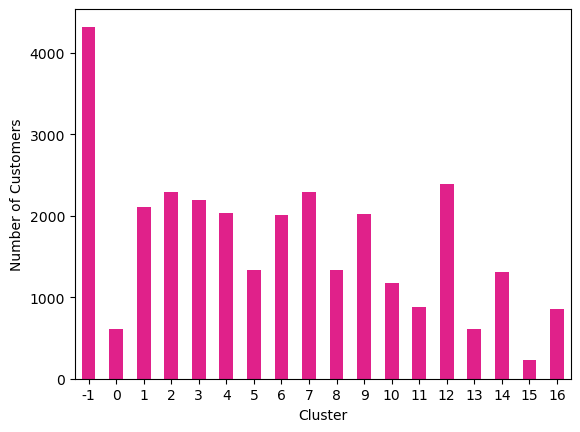

In [38]:
# Create a bar chart of the number of customers in each cluster
cluster_counts = num_cust_info.groupby(['dbscan_cluster_1']).size()
ax = cluster_counts.plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [41]:
num_cust_info['dbscan_cluster_2'] = DBSCAN(
    eps=3, min_samples=200
    ).fit_predict(scaled_data)

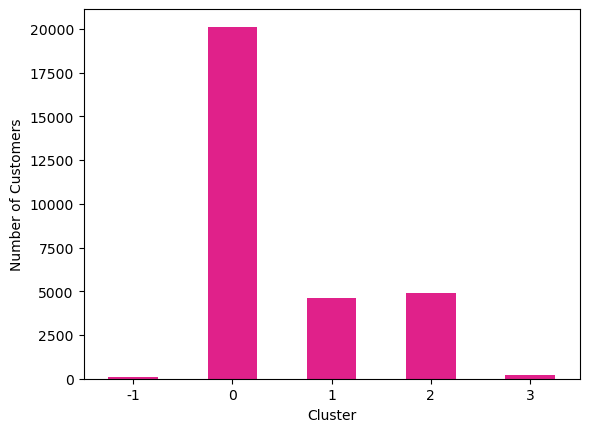

In [42]:
# Create a bar chart of the number of customers in each cluster
cluster_counts = num_cust_info.groupby(['dbscan_cluster_2']).size()
ax = cluster_counts.plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [43]:
num_cust_info['dbscan_cluster_nb_1'] = DBSCAN(
    eps=2, min_samples=200
    ).fit_predict(scaled_data_nb)

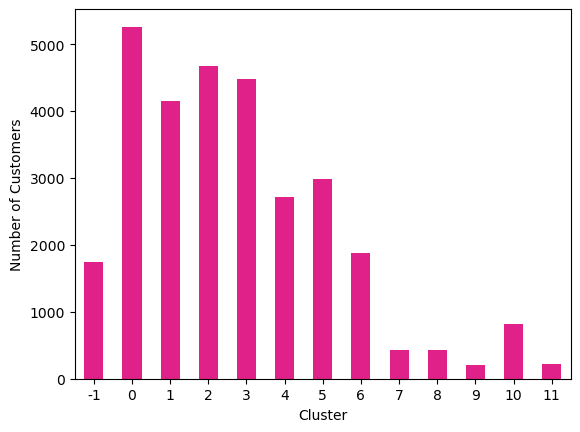

In [45]:
# Create a bar chart of the number of customers in each cluster
cluster_counts = num_cust_info.groupby(['dbscan_cluster_nb_1']).size()
ax = cluster_counts.plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [47]:
num_cust_info['dbscan_cluster_nb_2'] = DBSCAN(
    eps=3, min_samples=200
    ).fit_predict(scaled_data_nb)

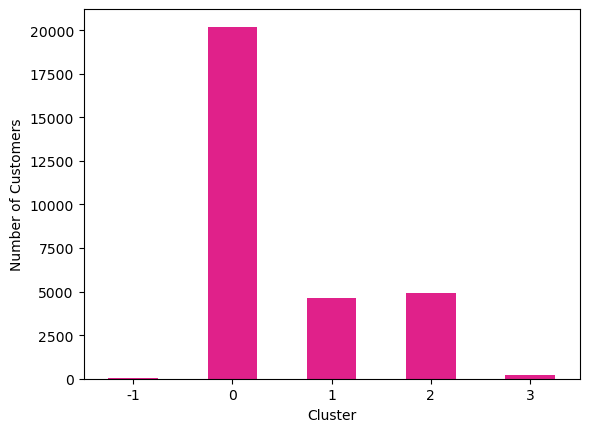

In [48]:
# Create a bar chart of the number of customers in each cluster
cluster_counts = num_cust_info.groupby(['dbscan_cluster_nb_2']).size()
ax = cluster_counts.plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Show the plot
plt.show()

Analysing these cases and taking into consideration that we tried it more times with different values for the parameters, we can conclude that the DBSCAN is not a good model for our dataset.

Droping the variables 'dbscan_cluster_1' and 'dbscan_cluster_2' since they are irrelevant for the rest of our work

In [49]:
num_cust_info = num_cust_info.drop([ 'dbscan_cluster_1', 'dbscan_cluster_2',
                                    'dbscan_cluster_nb_1', 'dbscan_cluster_nb_2'], axis=1)

## 5. Mean Shift

In [50]:
MeanShift = MeanShift(bin_seeding = True).fit(scaled_data)
num_cust_info['cluster_meanshift'] = MeanShift.predict(scaled_data)
num_cust_info['cluster_meanshift'].value_counts()

0    29774
1      224
Name: cluster_meanshift, dtype: int64

In [27]:
meanShift = MeanShift(bin_seeding = True).fit(scaled_data_nb)
num_cust_info['cluster_meanshift_nb'] = meanShift.predict(scaled_data_nb)
num_cust_info['cluster_meanshift_nb'].value_counts()

0    29774
1      224
Name: cluster_meanshift_nb, dtype: int64

Analysing these cases and taking into consideration that we tried it more times with different values for the parameters, we can conclude that the Mean Shift is not a good model for our dataset.

## 6. K-Means

### Find the ideal number of clusters

In [51]:
dispersion = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    dispersion.append(kmeans.inertia_)

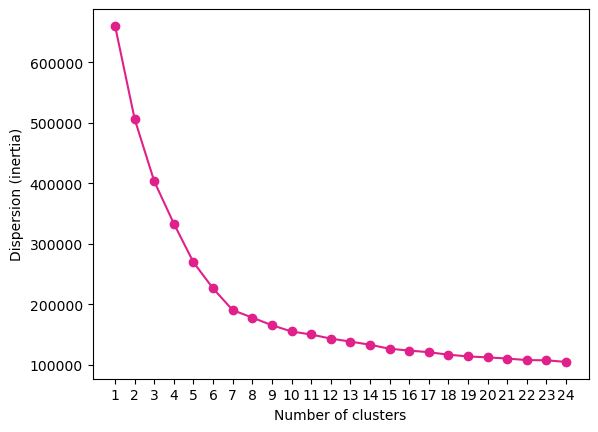

In [52]:
plt.plot(range(1, 25), dispersion, marker='o', color = '#e0218a')
plt.xticks(range(1, 25))
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.show()

In [53]:
dispersion_nb = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data_nb)
    dispersion_nb.append(kmeans.inertia_)

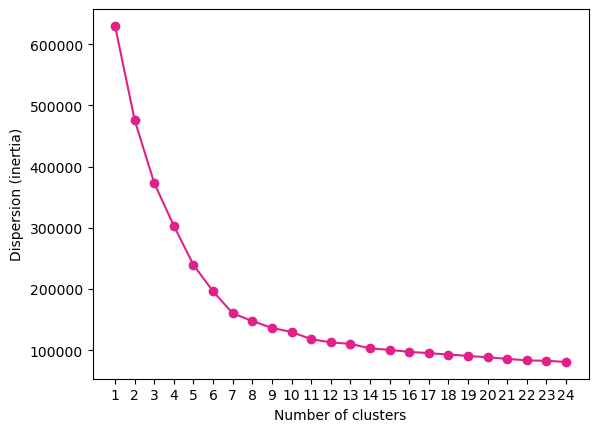

In [54]:
plt.plot(range(1, 25), dispersion_nb, marker='o', color = '#e0218a')
plt.xticks(range(1, 25))
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.show()

Looking at the graph above, we decided that the ideal number of clusters for our data is 7.

### K-Means using all the numerical variables

In [55]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(scaled_data)
num_cust_info['cluster_kmeans'] = kmeans.predict(scaled_data)

In [56]:
# Calculate mean for each variable
mean_values = num_cust_info.mean()

# Transpose grouped mean values
grouped_means = num_cust_info.groupby(['cluster_kmeans']).mean().T

# Add mean of every variable to the output
grouped_means['mean of variable'] = mean_values

grouped_means

cluster_kmeans,0,1,2,3,4,5,6,mean of variable
kids_home,0.974840,0.246872,3.134426,0.997483,0.689588,0.000000,1.128063,1.146776
teens_home,0.092510,0.175903,1.843279,0.271393,0.068547,0.000000,0.767391,0.512968
number_complaints,1.193536,0.200572,0.933989,1.550545,0.500000,0.000000,0.330237,0.764418
distinct_stores_visited,19.097155,2.422774,3.008962,7.995176,1.992625,1.000000,1.995257,6.121108
lifetime_spend_groceries,297.990323,3160.273865,4997.236066,14985.036703,200.406291,2.701888,969.416206,3978.899334
lifetime_spend_electronics,19.518870,628.466929,199.919126,199.973364,4999.557484,1.149657,83.862253,965.303071
typical_hour,9.041030,18.150518,17.399563,11.915059,20.951844,0.000000,9.745850,14.353124
lifetime_spend_vegetables,290.701955,281.888094,602.061421,799.401426,20.033623,2.124256,1420.649012,564.245311
lifetime_spend_nonalcohol_drinks,290.884072,327.667143,900.928743,900.777055,1500.946855,2.302029,37.548814,628.791908
lifetime_spend_alcohol_drinks,204.452874,481.339828,500.906448,599.134438,499.866161,2.704794,35.177668,379.369654


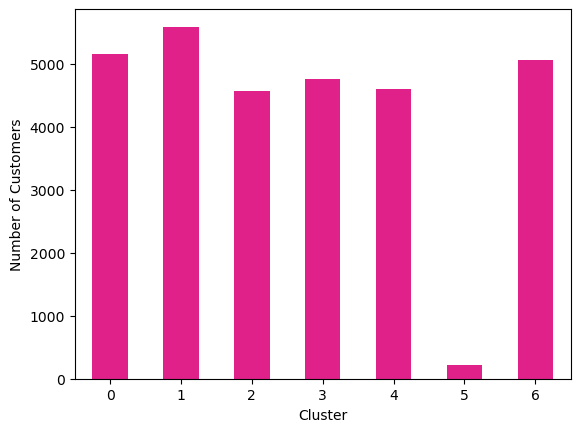

In [57]:
# Create a bar chart of the number of customers in each cluster
cluster_counts = num_cust_info.groupby(['cluster_kmeans']).size()
ax = cluster_counts.plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Show the plot
plt.show()


### K-Means excluding the binary variables

In [58]:
kmeans_nb = KMeans(n_clusters=7, random_state=0).fit(scaled_data_nb)
num_cust_info['cluster_kmeans_nb'] = kmeans_nb.predict(scaled_data_nb)

In [59]:
# Transpose grouped mean values
grouped_means_nb = num_cust_info.groupby(['cluster_kmeans_nb']).mean().T

# Add mean of every variable to the output
grouped_means_nb['mean of variable'] = mean_values

grouped_means_nb

cluster_kmeans_nb,0,1,2,3,4,5,6,mean of variable
kids_home,1.126378,0.689588,3.134426,0.974831,0.997483,0.000000,0.245516,1.146776
teens_home,0.766732,0.068547,1.843279,0.092159,0.271393,0.000000,0.174677,0.512968
number_complaints,0.332283,0.500000,0.933989,1.193224,1.550545,0.000000,0.198888,0.764418
distinct_stores_visited,1.994488,1.992625,3.008962,19.104163,7.995176,1.000000,2.424498,6.121108
lifetime_spend_groceries,967.573228,200.406291,4997.236066,298.020716,14985.036703,2.701888,3168.756277,3978.899334
lifetime_spend_electronics,85.604528,4999.557484,199.919126,19.522556,199.973364,1.149657,628.611191,965.303071
typical_hour,9.739764,20.951844,17.399563,9.041045,11.915059,0.000000,18.182927,14.353124
lifetime_spend_vegetables,1416.100787,20.033623,602.061421,290.776186,799.401426,2.124256,281.881636,564.245311
lifetime_spend_nonalcohol_drinks,38.487598,1500.946855,900.928743,290.957986,900.777055,2.302029,327.770803,628.791908
lifetime_spend_alcohol_drinks,36.096457,499.866161,500.906448,204.405421,599.134438,2.704794,482.047704,379.369654


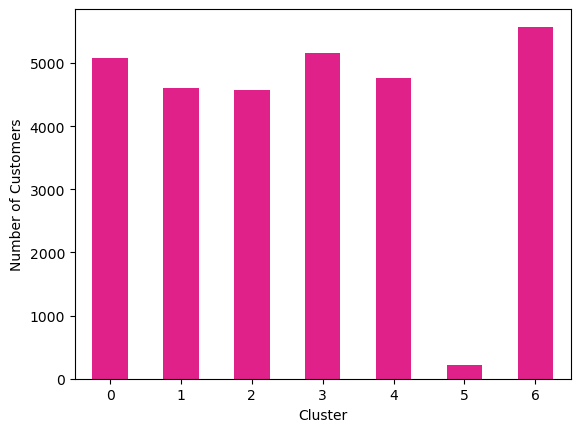

In [60]:
# Create a bar chart of the number of customers in each cluster
num_cust_info.groupby(['cluster_kmeans_nb']).size().plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
# Show the plot
plt.show()

In [61]:
pd.DataFrame(
    confusion_matrix(num_cust_info.cluster_kmeans, num_cust_info.cluster_kmeans_nb),
    index = ['K-means {} Cluster'.format(i) for i in np.arange(0,7)],
    columns = ['K-means_nb {} Cluster'.format(i) for i in np.arange(0,7)],
)

,K-means_nb 0 Cluster,K-means_nb 1 Cluster,K-means_nb 2 Cluster,K-means_nb 3 Cluster,K-means_nb 4 Cluster,K-means_nb 5 Cluster,K-means_nb 6 Cluster
K-means 0 Cluster,2,0,0,5165,0,0,0
K-means 1 Cluster,18,0,0,0,0,0,5576
K-means 2 Cluster,0,0,4575,0,0,0,0
K-means 3 Cluster,0,0,0,0,4768,0,0
K-means 4 Cluster,0,4610,0,0,0,0,0
K-means 5 Cluster,0,0,0,0,0,224,0
K-means 6 Cluster,5060,0,0,0,0,0,0


## 5. Bisecting K-Means Clustering

In [62]:
dispersion_bkm = []
for k in range(1, 25):
    bisect_kmeans = BisectingKMeans(n_clusters=k, random_state=0).fit(scaled_data)
    dispersion_bkm.append(bisect_kmeans.inertia_)

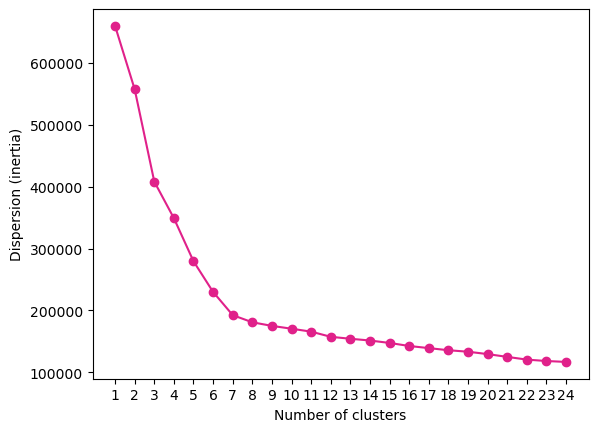

In [63]:
plt.plot(range(1, 25), dispersion_bkm, marker='o', color = '#e0218a')
plt.xticks(range(1, 25))
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.show()

In [64]:
bisect_kmeans = BisectingKMeans(n_clusters=7, random_state=0).fit(scaled_data)
num_cust_info['cluster_bisect_kmeans'] = bisect_kmeans.predict(scaled_data)

In [65]:
# Transpose grouped mean values
grouped_means_bk = num_cust_info.groupby(['cluster_bisect_kmeans']).mean().T

# Add mean of every variable to the output
grouped_means_bk['mean of variable'] = mean_values

grouped_means_bk

cluster_bisect_kmeans,0,1,2,3,4,5,6,mean of variable
kids_home,0.993535,3.079854,1.058246,0.000000,0.974026,0.191301,0.689588,1.146776
teens_home,0.270073,1.809891,0.744787,0.000000,0.090715,0.112542,0.068547,0.512968
number_complaints,1.543691,0.929779,0.377391,0.000000,1.191704,0.114654,0.500000,0.764418
distinct_stores_visited,7.966840,3.009206,1.995692,1.000000,19.125218,2.471706,1.992625,6.121108
lifetime_spend_groceries,14936.992492,5007.057161,940.129416,2.701888,298.180074,3469.134079,200.406291,3978.899334
lifetime_spend_electronics,203.337643,203.345322,138.148372,1.149657,19.534018,650.688978,4999.557484,965.303071
typical_hour,11.946611,17.408692,9.946407,0.000000,9.041287,19.217483,20.951844,14.353124
lifetime_spend_vegetables,797.663816,601.347463,1276.038256,2.124256,290.998062,273.141681,20.033623,564.245311
lifetime_spend_nonalcohol_drinks,898.870699,898.432884,68.900569,2.302029,291.173871,323.893159,1500.946855,628.791908
lifetime_spend_alcohol_drinks,598.117205,500.179833,68.996381,2.704794,204.522388,510.032306,499.866161,379.369654


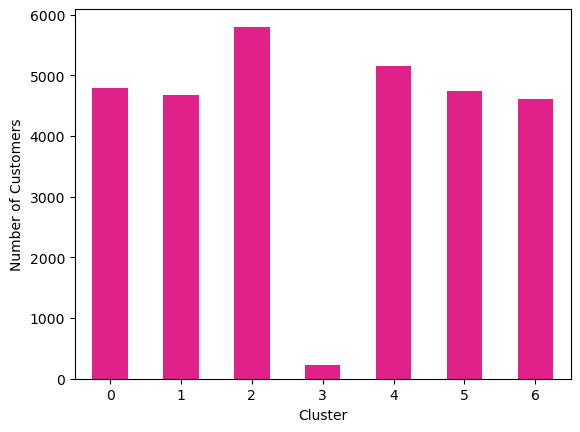

In [66]:
# Create a bar chart of the number of customers in each cluster
num_cust_info.groupby(['cluster_bisect_kmeans']).size().plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
# Show the plot
plt.show()

### Comparing the Bisecting K-Means with the K-Means

In [67]:
# Checking the Bisecting K-Means vs. K-Means
pd.DataFrame(
    confusion_matrix(num_cust_info.cluster_kmeans, num_cust_info.cluster_bisect_kmeans),
    index = ['K-means {} Cluster'.format(i) for i in np.arange(0,7)],
    columns = ['Bisecting K-Means {} Cluster'.format(i) for i in np.arange(0,7)],
)

,Bisecting K-Means 0 Cluster,Bisecting K-Means 1 Cluster,Bisecting K-Means 2 Cluster,Bisecting K-Means 3 Cluster,Bisecting K-Means 4 Cluster,Bisecting K-Means 5 Cluster,Bisecting K-Means 6 Cluster
K-means 0 Cluster,0,0,17,0,5150,0,0
K-means 1 Cluster,27,96,727,0,9,4735,0
K-means 2 Cluster,0,4575,0,0,0,0,0
K-means 3 Cluster,4768,0,0,0,0,0,0
K-means 4 Cluster,0,0,0,0,0,0,4610
K-means 5 Cluster,0,0,0,224,0,0,0
K-means 6 Cluster,0,0,5059,0,0,1,0


## 6. Hierarchical Clustering

# POR FUNÇÃO NOS UTILS

In [21]:
def plot_dendrogram(model, **kwargs):
    '''
    Create linkage matrix and then plot the dendrogram
    Arguments: 
    - model(HierarchicalClustering Model): hierarchical clustering model.
    - **kwargs
    Returns:
    None, but dendrogram plot is produced.
    '''
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

### Single Linkage Hierarchical

In [22]:
minimum_hierarchical = AgglomerativeClustering(
    linkage='single', distance_threshold=0, n_clusters=None
    ).fit(scaled_data)

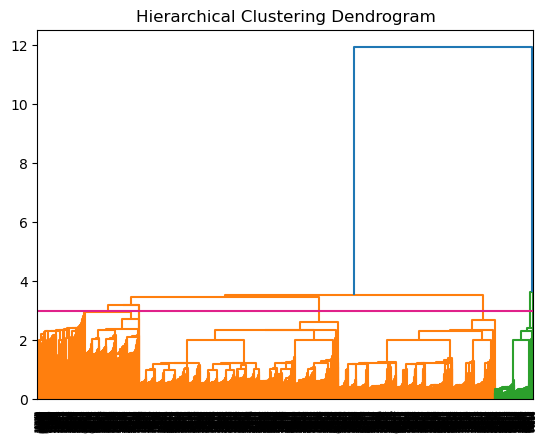

In [24]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(minimum_hierarchical, truncate_mode="level", p=50)
plt.axhline(y =3 , color = '#e0218a', linestyle = '-')
plt.show()

In [25]:
num_cust_info['cluster_single'] = AgglomerativeClustering(
    linkage='single', n_clusters=7
    ).fit_predict(scaled_data)

In [80]:
# Transpose grouped mean values
grouped_means_single = num_cust_info.groupby(['cluster_single']).mean().T

# Add mean of every variable to the output
grouped_means_single['mean of variable'] = mean_values

grouped_means_single

cluster_single,0,1,2,3,4,5,6,mean of variable
kids_home,1.299294,1.000203,0.000000,0.000000,0.689588,0.000000,1.000000,1.146776
teens_home,0.727583,0.069904,0.000000,0.000000,0.068547,0.000000,1.000000,0.512968
number_complaints,0.773331,1.010567,0.000000,0.000000,0.500000,0.000000,0.000000,0.764418
distinct_stores_visited,3.743787,20.001829,1.000000,1.000000,1.992625,2.000000,2.000000,6.121108
lifetime_spend_groceries,5777.540191,302.959764,2.702259,2.619245,200.406291,109.000000,379.000000,3978.899334
lifetime_spend_electronics,287.040956,20.000000,1.149473,1.190543,4999.557484,17.000000,511.000000,965.303071
typical_hour,14.312682,8.991668,0.000000,0.000000,20.951844,23.000000,3.000000,14.353124
lifetime_spend_vegetables,758.630305,300.231863,2.124171,2.143204,20.033623,22.000000,501.000000,564.245311
lifetime_spend_nonalcohol_drinks,516.956129,300.431823,2.302130,2.279556,1500.946855,186.000000,299.000000,628.791908
lifetime_spend_alcohol_drinks,399.738254,199.776671,2.704779,2.708169,499.866161,898.000000,241.000000,379.369654


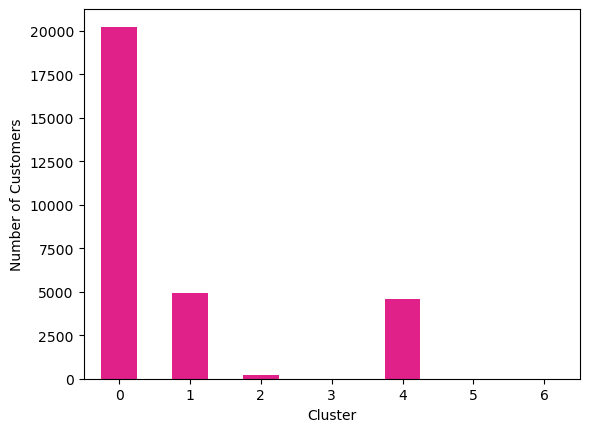

In [83]:
# Create a bar chart of the number of customers in each cluster
num_cust_info.groupby(['cluster_single']).size().plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
# Show the plot
plt.show()

### Ward Hierarchical

In [44]:
agg_clust = AgglomerativeClustering(
    linkage='ward', distance_threshold=0, n_clusters=None
    ).fit(scaled_data)

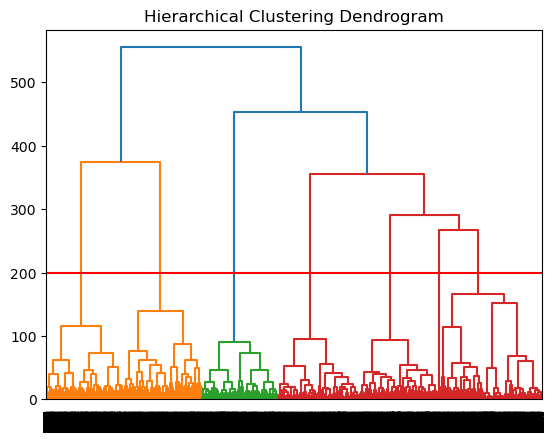

In [49]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_clust, truncate_mode="level", p=50)
plt.axhline(y = 200, color = 'r', linestyle = '-')
plt.show()

In [50]:
num_cust_info['cluster_ward'] = AgglomerativeClustering(
    linkage='ward', n_clusters=7
    ).fit_predict(scaled_data)

In [79]:
# Transpose grouped mean values
grouped_means_ward = num_cust_info.groupby(['cluster_ward']).mean().T

# Add mean of every variable to the output
grouped_means_ward['mean of variable'] = mean_values

grouped_means_ward

cluster_ward,0,1,2,3,4,5,6,mean of variable
kids_home,0.278654,3.078852,1.160525,0.997901,1.000203,0.689588,0.000000,1.146776
teens_home,0.219376,1.811656,0.771495,0.271620,0.069904,0.068547,0.000000,0.512968
number_complaints,0.400493,0.933576,0.310885,1.551008,1.010567,0.500000,0.000000,0.764418
distinct_stores_visited,2.330378,3.007285,2.000212,7.999580,20.001829,1.992625,1.000000,6.121108
lifetime_spend_groceries,2870.941708,4997.018856,997.551461,14993.307935,302.959764,200.406291,2.701888,3978.899334
lifetime_spend_electronics,605.609360,200.006642,50.036637,199.970403,20.000000,4999.557484,1.149657,965.303071
typical_hour,17.173563,17.401971,9.988564,11.914568,8.991668,20.951844,0.000000,14.353124
lifetime_spend_vegetables,271.772085,602.098779,1499.739094,799.560034,300.231863,20.033623,2.124256,564.245311
lifetime_spend_nonalcohol_drinks,307.784401,900.787872,20.005294,900.786104,300.431823,1500.946855,2.302029,628.791908
lifetime_spend_alcohol_drinks,460.626108,500.900364,20.117535,599.145886,199.776671,499.866161,2.704794,379.369654


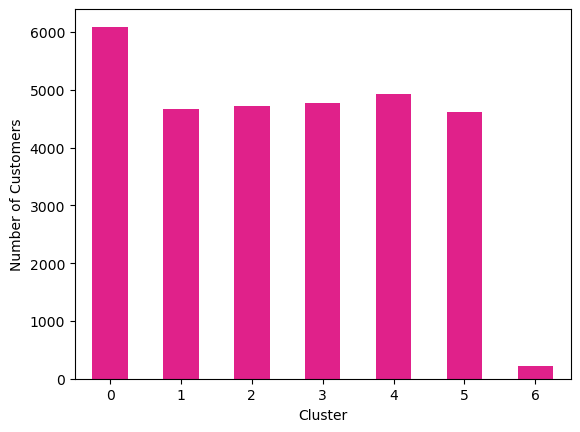

In [85]:
# Create a bar chart of the number of customers in each cluster
num_cust_info.groupby(['cluster_ward']).size().plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
# Show the plot
plt.show()

### Comparing the ward clusters with the minimum clusters

In [55]:
#Starting with the Ward vs. Single:
pd.DataFrame(
    confusion_matrix(num_cust_info.cluster_single, num_cust_info.cluster_ward),
    index = ['Single {} Cluster'.format(i) for i in np.arange(0,7)],
    columns = ['Ward {} Cluster'.format(i) for i in np.arange(0,7)],
)

,Ward 0 Cluster,Ward 1 Cluster,Ward 2 Cluster,Ward 3 Cluster,Ward 4 Cluster,Ward 5 Cluster,Ward 6 Cluster
Single 0 Cluster,6088,4667,4722,4764,0,0,0
Single 1 Cluster,0,0,0,0,4921,0,0
Single 2 Cluster,0,0,0,0,0,0,223
Single 3 Cluster,0,0,0,0,0,0,1
Single 4 Cluster,0,0,0,0,0,4610,0
Single 5 Cluster,1,0,0,0,0,0,0
Single 6 Cluster,1,0,0,0,0,0,0


Looking at the table above, we are able to see that when using the single linkage method almost all of the observations are classified as the same cluster. Cluster 0 of single linkage has the observations of 4 clusters in the ward. Taking this into consideration and the other observations made above, we decided to only compare the results of the Ward with our solution of K-means.

In [65]:
# Checking the Ward vs. K-Means
pd.DataFrame(
    confusion_matrix(num_cust_info.cluster_kmeans, num_cust_info.cluster_ward),
    index = ['K-means {} Cluster'.format(i) for i in np.arange(0,7)],
    columns = ['Ward {} Cluster'.format(i) for i in np.arange(0,7)],
)

,Ward 0 Cluster,Ward 1 Cluster,Ward 2 Cluster,Ward 3 Cluster,Ward 4 Cluster,Ward 5 Cluster,Ward 6 Cluster
K-means 0 Cluster,246,0,0,0,4921,0,0
K-means 1 Cluster,5506,88,0,0,0,0,0
K-means 2 Cluster,0,4575,0,0,0,0,0
K-means 3 Cluster,0,4,0,4764,0,0,0
K-means 4 Cluster,0,0,0,0,0,4610,0
K-means 5 Cluster,0,0,0,0,0,0,224
K-means 6 Cluster,338,0,4722,0,0,0,0


In [66]:
# Checking the Ward vs. Bisecting K-Means
pd.DataFrame(
    confusion_matrix(num_cust_info.cluster_bisect_kmeans, num_cust_info.cluster_ward),
    index = ['Bisecting K-means {} Cluster'.format(i) for i in np.arange(0,7)],
    columns = ['Ward {} Cluster'.format(i) for i in np.arange(0,7)],
)

,Ward 0 Cluster,Ward 1 Cluster,Ward 2 Cluster,Ward 3 Cluster,Ward 4 Cluster,Ward 5 Cluster,Ward 6 Cluster
Bisecting K-means 0 Cluster,19,12,0,4764,0,0,0
Bisecting K-means 1 Cluster,21,4650,0,0,0,0,0
Bisecting K-means 2 Cluster,1081,0,4722,0,0,0,0
Bisecting K-means 3 Cluster,0,0,0,0,0,0,224
Bisecting K-means 4 Cluster,238,0,0,0,4921,0,0
Bisecting K-means 5 Cluster,4731,5,0,0,0,0,0
Bisecting K-means 6 Cluster,0,0,0,0,0,4610,0


## 6. Self Organizing Maps